# EDA Water with diferent flow

The following datasets are sampled with the frequency 500Hz

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Load data and preprocess data

In [14]:
def load_data(filename):
    df = pd.read_csv(filename)
    # Normalize sensor data
    df['x_norm'] = (df.x - df.x.mean()) / (df.x.max() - df.x.min())
    df['y_norm'] = (df.y - df.y.mean()) / (df.y.max() - df.y.min())
    df['z_norm'] = (df.z - df.z.mean()) / (df.z.max() - df.z.min())
    return df

data_frame20 = load_data('../../datasets/vibrations/argo-data_salt-only_20lpm.csv')
data_frame40 = load_data('../../datasets/vibrations/argo-data_salt-only_40lpm.csv')
data_frame60 = load_data('../../datasets/vibrations/argo-data_salt-only_60lpm.csv')
data_frame80 = load_data('../../datasets/vibrations/argo-data_salt-only_80lpm.csv')
data_frame20.head()

,x,y,z,flow,temp,x_norm,y_norm,z_norm
0,909,25,52548,0,65152,0.023712,-0.005429,0.011895
1,917,33,52545,0,65152,0.095140,-0.005307,-0.002391
2,909,30,52560,0,65152,0.023712,-0.005352,0.069037
3,911,32,52557,0,65152,0.041569,-0.005322,0.054752
4,905,39,52551,0,65152,-0.012003,-0.005215,0.026180


# Plot columns

## Flow

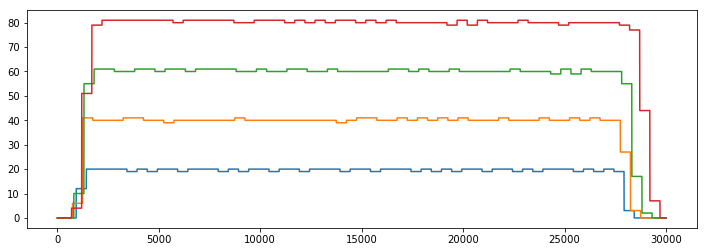

In [42]:
rcParams['figure.figsize'] = 12, 4
data_frame20.flow.plot()
data_frame40.flow.plot()
data_frame60.flow.plot()
data_frame80.flow.plot()
plt.show()

## Vibration sensor

x_norm


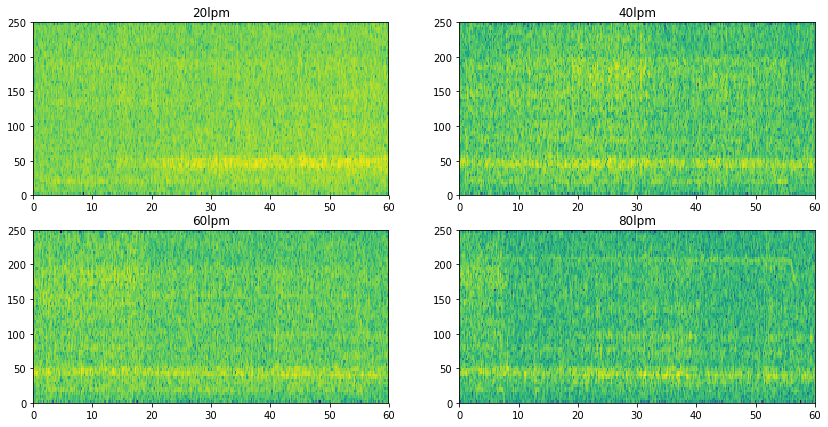

y_norm


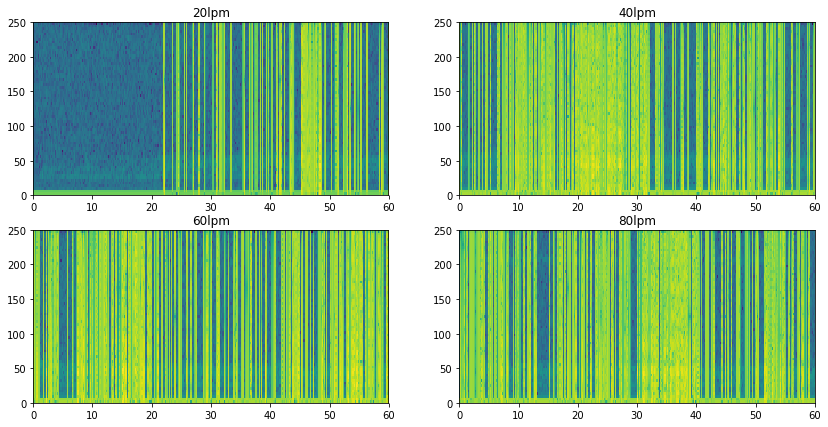

z_norm


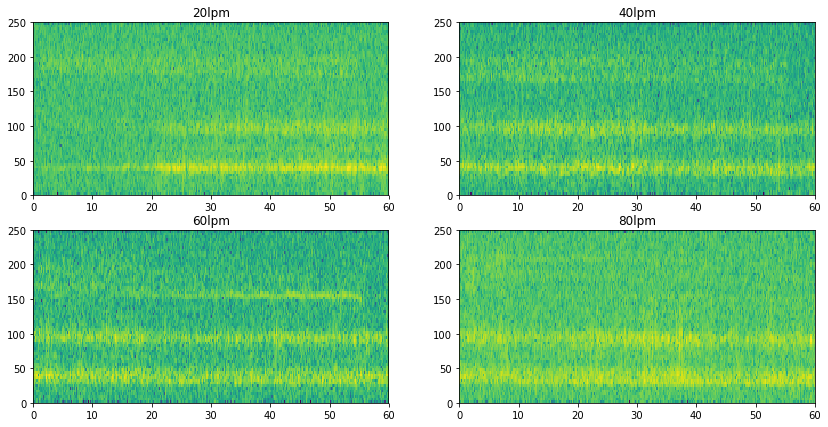

In [33]:
NFFT = 128
noverlap = NFFT / 4

def plot_axis(d1, d2, d3, d4, title):
    rcParams['figure.figsize'] = 14, 7
    print(title)
    f = plt.figure(1)
    plt.subplot(221)
    plt.title('20lpm')
    plt.specgram(d1, Fs=500, NFFT=NFFT, noverlap=noverlap)
    plt.subplot(222)
    plt.title('40lpm')
    plt.specgram(d2, Fs=500, NFFT=NFFT, noverlap=noverlap)
    plt.subplot(223)
    plt.title('60lpm')
    plt.specgram(d3, Fs=500, NFFT=NFFT, noverlap=noverlap)
    plt.subplot(224)
    plt.title('80lpm')
    plt.specgram(d4, Fs=500, NFFT=NFFT, noverlap=noverlap)
    plt.show()

plot_axis(data_frame20.x_norm, data_frame40.x_norm, data_frame60.x_norm, data_frame80.x_norm, "x_norm")    
plot_axis(data_frame20.y_norm, data_frame40.y_norm, data_frame60.y_norm, data_frame80.y_norm, "y_norm")    
plot_axis(data_frame20.z_norm, data_frame40.z_norm, data_frame60.z_norm, data_frame80.z_norm, "z_norm")    

x


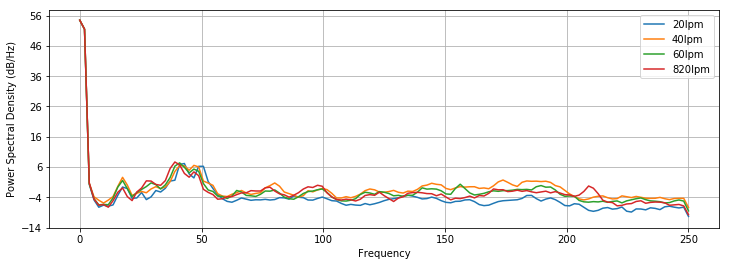

y


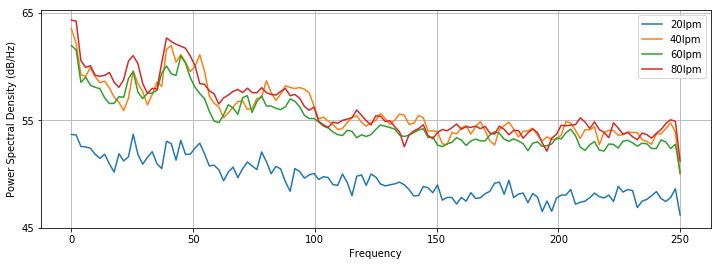

z


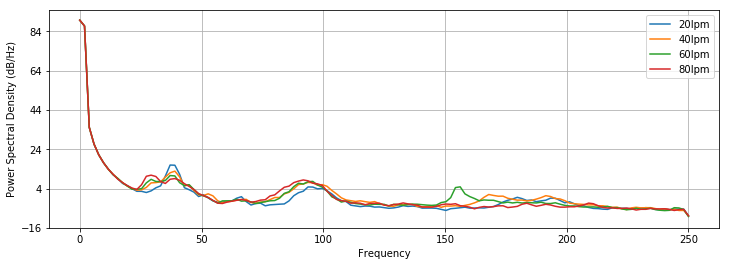

In [43]:
rcParams['figure.figsize'] = 12, 4
print('x')
plt.psd(data_frame20.x, Fs=500, label='20lpm')
plt.psd(data_frame40.x, Fs=500, label='40lpm')
plt.psd(data_frame60.x, Fs=500, label='60lpm')
plt.psd(data_frame80.x, Fs=500, label='820lpm')
plt.legend()
plt.show()

print('y')
plt.psd(data_frame20.y, Fs=500, label='20lpm')
plt.psd(data_frame40.y, Fs=500, label='40lpm')
plt.psd(data_frame60.y, Fs=500, label='60lpm')
plt.psd(data_frame80.y, Fs=500, label='80lpm')
plt.legend()
plt.show()

print('z')
plt.psd(data_frame20.z, Fs=500, label='20lpm')
plt.psd(data_frame40.z, Fs=500, label='40lpm')
plt.psd(data_frame60.z, Fs=500, label='60lpm')
plt.psd(data_frame80.z, Fs=500, label='80lpm')
plt.legend()
plt.show()